In [380]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import PoissonRegressor
from sklearn.pipeline import make_pipeline

In [176]:
data = pd.read_csv("data/data_clean.csv")

In [177]:
list(data.columns)

['Year',
 'Team',
 'Conf',
 'Seed',
 'Wins',
 'Won_ConfT',
 'Round_32',
 'Sweet_16',
 'Elite_8',
 'Final_4',
 'Champ_Game',
 'Won_Natty',
 'AdjO',
 'AdjD',
 'AdjEM',
 'BARTHAG',
 'EFG%',
 'EFG%D',
 'FT%',
 'FTR',
 'FTRD',
 'TOV%',
 'TOV%D',
 'TOV%_Diff',
 'OREB%',
 'DREB%',
 '2PT%',
 '2PTR',
 '2PT%D',
 '2PTRD',
 '3PT%',
 '3PTR',
 '3PT%D',
 '3PTRD',
 'AST%',
 'Height',
 'Experience',
 'Talent',
 'AdjT',
 'W',
 'Elite_SOS',
 'WAB',
 'FT_Off_Eff',
 'FT_Def_Eff',
 '2pt_Off_Eff',
 '2pt_Def_Eff',
 '3pt_Off_Eff',
 '3pt_Def_Eff',
 'AdjO_z',
 'AdjD_z',
 'BARTHAG_z',
 'EFG%_z',
 'EFG%D_z',
 'FT_Off_Eff_z',
 'FT_Def_Eff_z',
 'TOV%_z',
 'TOV%D_z',
 'OREB%_z',
 'DREB%_z',
 '2pt_Off_Eff_z',
 '2pt_Def_Eff_z',
 '3pt_Off_Eff_z',
 '3pt_Def_Eff_z',
 'AST%_z',
 'Elite_SOS_z',
 'WAB_z']

In [178]:
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023, 2024, 2025]

In [179]:
def get_proj_wins(x_train, x_test, y_train_series):

    model = make_pipeline(StandardScaler(), PoissonRegressor(alpha=0.5, max_iter=10000)) # Creates poisson regression model as model
    model.fit(x_train, y_train_series) # Fits model to training data
    y_pred = model.predict(x_test)     # Predicts outcome of testing data based on model
    
    scale = 63 / y_pred.sum()         
    
    y_pred_scaled = y_pred * scale    # Scales the output so the sum is 63 (the number of wins in every tournament)
    
    return y_pred_scaled

In [180]:
def get_ranks(data_train, data_test):
    
    x_train = data_train[['Won_ConfT', 'Height','Experience','Talent','AdjT', 'AdjO_z','AdjD_z','BARTHAG_z','EFG%_z','EFG%D_z','FT_Off_Eff_z','FT_Def_Eff_z','TOV%_z','TOV%D_z','OREB%_z','DREB%_z','2pt_Off_Eff_z','2pt_Def_Eff_z','3pt_Off_Eff_z','3pt_Def_Eff_z','AST%_z', 'Elite_SOS_z','WAB_z']]
    x_test = data_test[['Won_ConfT', 'Height','Experience','Talent','AdjT', 'AdjO_z','AdjD_z','BARTHAG_z','EFG%_z','EFG%D_z','FT_Off_Eff_z','FT_Def_Eff_z','TOV%_z','TOV%D_z','OREB%_z','DREB%_z','2pt_Off_Eff_z','2pt_Def_Eff_z','3pt_Off_Eff_z','3pt_Def_Eff_z','AST%_z', 'Elite_SOS_z','WAB_z']]
    
    data_test.loc[:, 'Proj_Wins'] = get_proj_wins(x_train, x_test, data_train['Wins'])
    data_test.loc[:, 'Proj_Wins_Rank'] = data_test['Proj_Wins'].rank(ascending=False, method='min').astype(int)
    data_test.loc[:, 'Wins_Rank'] = data_test['Wins'].rank(ascending=False, method='min').astype(int)

    
    return data_test

In [181]:
ranks = []

for year in years:

    data_train = data[data['Year'] < year]
    data_test0 = data[data['Year'] == year].copy()

    data_test = get_ranks(data_train, data_test0)
    
    ranks.append(data_test)

In [182]:
df = pd.concat(ranks, axis=0)

In [183]:
df = df[['Year', 'Team', 'Seed', 'Wins', 'Wins_Rank', 'Proj_Wins', 'Proj_Wins_Rank']].sort_values(by='Wins', ascending=False)

In [184]:
df['Wins_Rank'].unique()

array([ 1,  2,  3,  5,  9, 17, 33])

In [185]:
df[(df['Wins_Rank'] == 1) & (df['Proj_Wins_Rank'] == 1)]

,Year,Team,Seed,Wins,Wins_Rank,Proj_Wins,Proj_Wins_Rank
777,2013,Louisville,1,6,1,3.441082,1


In [186]:
df[df['Proj_Wins_Rank'] == 2]

,Year,Team,Seed,Wins,Wins_Rank,Proj_Wins,Proj_Wins_Rank
229,2022,Kansas,1,6,1,2.587712,2
509,2017,North Carolina,1,6,1,2.642189,2
402,2019,Virginia,1,6,1,3.058160,2
80,2024,Connecticut,1,6,1,3.505453,2
469,2018,Villanova,1,6,1,3.393001,2
21,2025,Houston,1,5,2,3.750173,2
676,2015,Wisconsin,1,5,2,3.933767,2
569,2016,Kansas,1,3,5,3.146604,2
682,2014,Arizona,1,3,5,2.674279,2
768,2013,Indiana,1,2,9,2.566734,2


In [187]:
df.loc[(df['Proj_Wins_Rank'] >= 3) & (df['Proj_Wins_Rank'] <= 4), 'Proj_Wins_Rank'] = 3
df.loc[(df['Proj_Wins_Rank'] >= 5) & (df['Proj_Wins_Rank'] <= 8), 'Proj_Wins_Rank'] = 5
df.loc[(df['Proj_Wins_Rank'] >= 9) & (df['Proj_Wins_Rank'] <= 16), 'Proj_Wins_Rank'] = 9
df.loc[(df['Proj_Wins_Rank'] >= 17) & (df['Proj_Wins_Rank'] <= 32), 'Proj_Wins_Rank'] = 17
df.loc[(df['Proj_Wins_Rank'] >= 33) & (df['Proj_Wins_Rank'] <= 68), 'Proj_Wins_Rank'] = 33

In [190]:
df.loc[df['Proj_Wins_Rank'] == 1, 'Proj_Wins_Binned'] = 6
df.loc[df['Proj_Wins_Rank'] == 2, 'Proj_Wins_Binned'] = 5
df.loc[(df['Proj_Wins_Rank'] >= 3) & (df['Proj_Wins_Rank'] <= 4), 'Proj_Wins_Binned'] = 4
df.loc[(df['Proj_Wins_Rank'] >= 5) & (df['Proj_Wins_Rank'] <= 8), 'Proj_Wins_Binned'] = 3
df.loc[(df['Proj_Wins_Rank'] >= 9) & (df['Proj_Wins_Rank'] <= 16), 'Proj_Wins_Binned'] = 2
df.loc[(df['Proj_Wins_Rank'] >= 17) & (df['Proj_Wins_Rank'] <= 32), 'Proj_Wins_Binned'] = 1
df.loc[(df['Proj_Wins_Rank'] >= 33) & (df['Proj_Wins_Rank'] <= 68), 'Proj_Wins_Binned'] = 0

In [193]:
df['Proj_Wins_Binned'] = df['Proj_Wins_Binned'].astype(int)

In [194]:
df

,Year,Team,Seed,Wins,Wins_Rank,Proj_Wins,Proj_Wins_Rank,Proj_Wins_Binned
690,2014,Connecticut,7,6,1,0.986478,17,1
229,2022,Kansas,1,6,1,2.587712,2,5
509,2017,North Carolina,1,6,1,2.642189,2,5
276,2021,Baylor,1,6,1,2.648861,3,4
777,2013,Louisville,1,6,1,3.441082,1,6
...,...,...,...,...,...,...,...,...
410,2018,Arizona St.,11,0,33,0.652191,33,0
409,2018,Arizona,4,0,33,1.431637,9,2
541,2017,Winthrop,13,0,33,0.240346,33,0
538,2017,Wake Forest,11,0,33,0.653970,33,0


In [195]:
df[df['Year'] == 2023].head()

,Year,Team,Seed,Wins,Wins_Rank,Proj_Wins,Proj_Wins_Rank,Proj_Wins_Binned
145,2023,Connecticut,4,6,1,1.606413,9,2
186,2023,San Diego St.,5,5,2,1.041288,17,1
150,2023,Florida Atlantic,9,4,3,0.922980,17,1
170,2023,Miami FL,5,4,3,0.918061,17,1
152,2023,Gonzaga,3,3,5,2.218387,5,3


In [203]:
df[(df['Year'] == 2013) & (df['Proj_Wins_Binned'] == df['Wins'])]

,Year,Team,Seed,Wins,Wins_Rank,Proj_Wins,Proj_Wins_Rank,Proj_Wins_Binned
777,2013,Louisville,1,6,1,3.441082,1,6
762,2013,Florida,3,3,5,1.854221,5,3
782,2013,Michigan St.,3,2,9,1.504013,9,2
750,2013,Arizona,6,2,9,1.477696,9,2
767,2013,Illinois,7,1,17,1.082434,17,1
790,2013,North Carolina,8,1,17,1.220457,17,1
784,2013,Minnesota,11,1,17,1.047425,17,1
811,2013,VCU,5,1,17,1.048370,17,1
758,2013,Colorado St.,8,1,17,1.252067,17,1
754,2013,Butler,6,1,17,0.889018,17,1


In [288]:
def correct(df, years):   
    
    correct = []
    incorrect = []

    for year in years:

        correct.append(len(df[(df['Year'] == year) & (df['Wins'] == df['Proj_Wins_Binned'])]))
        incorrect.append((68 - len(df[(df['Year'] == year) & (df['Wins'] == df['Proj_Wins_Binned'])])))

    x = np.arange(len(years))

    plt.figure(figsize=(12, 5))

    plt.bar(x, correct, color='g', label='Correct')

    plt.xlabel('Year')
    plt.ylabel('Accuracy')
    plt.xticks(x, years)
    for i, correct in enumerate(correct):
           plt.text(i, correct, str(correct), ha='center', va='bottom') 

    plt.show()

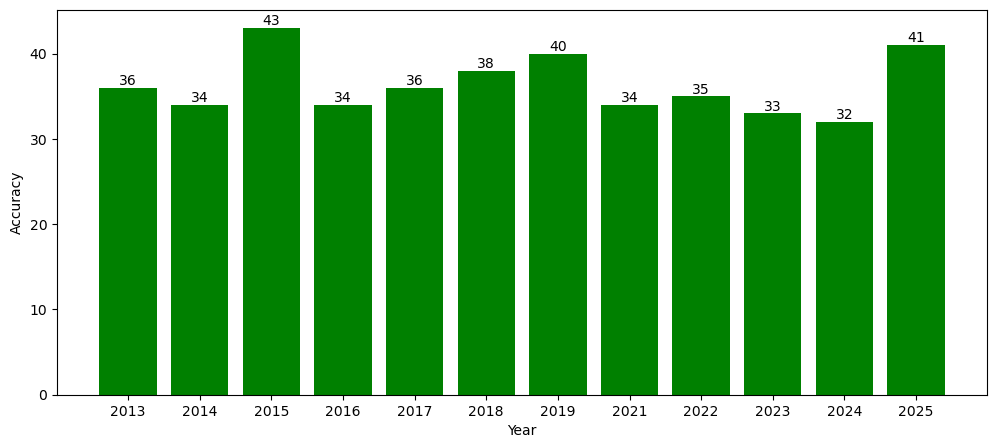

In [289]:
correct(df, years)

In [256]:
df[(df['Year'] == 2025) & (df['Wins'] == df['Proj_Wins_Binned'])].sort_values('Proj_Wins', ascending=False)

,Year,Team,Seed,Wins,Wins_Rank,Proj_Wins,Proj_Wins_Rank,Proj_Wins_Binned
21,2025,Houston,1,5,2,3.750173,2,5
6,2025,Auburn,1,4,3,2.388936,3,4
53,2025,Tennessee,2,3,5,1.853566,5,3
1,2025,Alabama,2,3,5,1.765591,5,3
4,2025,Arizona,4,2,9,1.345435,9,2
33,2025,Michigan,5,2,9,1.245115,9,2
22,2025,Illinois,6,1,17,1.184244,17,1
59,2025,UCLA,7,1,17,1.147100,17,1
49,2025,Saint Mary's,7,1,17,1.124160,17,1
64,2025,Wisconsin,3,1,17,1.048462,17,1


In [286]:
def correct_upsets(df, years):   
    
    correct = []
    incorrect = []

    for year in years:

        correct.append(len(df[(df['Year'] == year) & (df['Seed'] > 8) & (df['Wins'] > 0) & (df['Proj_Wins_Binned'] > 0)]))
        incorrect.append((68 - len(df[(df['Year'] == year) & (df['Seed'] > 8) & (df['Wins'] > 0) & (df['Proj_Wins_Binned'] > 0)])))

    x = np.arange(len(years))

    plt.figure(figsize=(12, 5))

    plt.bar(x, correct, color='g', label='Correct')

    plt.xlabel('Year')
    plt.ylabel('Accuracy')
    plt.xticks(x, years)
    for i, correct in enumerate(correct):
               plt.text(i, correct, str(correct), ha='center', va='bottom') 

    plt.show()

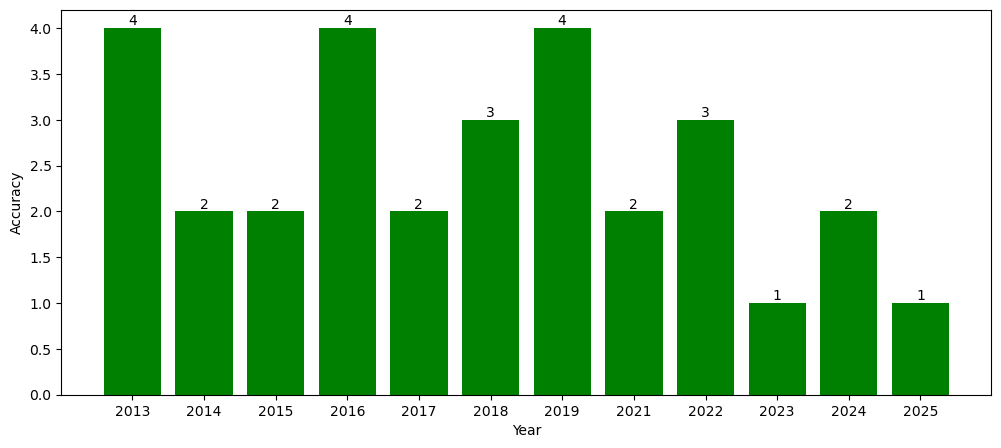

In [287]:
correct_upsets(df, years)

In [252]:
df[(df['Year'] == 2014) & (df['Seed'] > 8) & (df['Wins'] > 0) & (df['Proj_Wins_Binned'] > 0)]

,Year,Team,Seed,Wins,Wins_Rank,Proj_Wins,Proj_Wins_Rank,Proj_Wins_Binned
734,2014,Tennessee,11,2,9,1.123262,17,1
726,2014,Pittsburgh,9,1,17,1.261263,17,1


In [284]:
def correct_r32(df, years):
    
    correct = []

    for year in years:

        correct.append(len(df[(df['Year'] == year) & ((df['Wins'] > 0) & (df['Proj_Wins_Binned'] > 0))]))

    x = np.arange(len(years))

    plt.figure(figsize=(12, 5))

    plt.bar(x, correct, color='g', label='Correct')

    plt.xlabel('Year')
    plt.ylabel('Accuracy')
    plt.xticks(x, years)
    for i, correct in enumerate(correct):
           plt.text(i, correct, str(correct), ha='center', va='bottom')    

    plt.show()

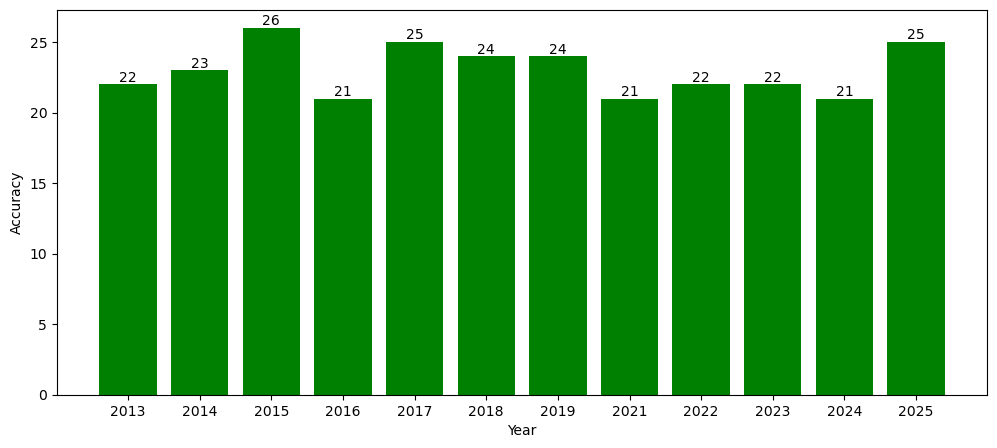

In [285]:
correct_r32(df, years)

In [328]:
df[(df['Year'] == 2014) & (df['Wins'] > 0) & (df['Proj_Wins_Binned'] > 0)]

,Year,Team,Seed,Wins,Wins_Rank,Proj_Wins,Proj_Wins_Rank,Proj_Wins_Binned
690,2014,Connecticut,7,6,1,0.986478,17,1
704,2014,Kentucky,8,5,2,1.528274,9,2
696,2014,Florida,1,4,3,3.134863,1,6
745,2014,Wisconsin,2,4,3,1.524231,9,2
711,2014,Michigan,2,3,5,1.345152,17,1
712,2014,Michigan St.,4,3,5,2.205129,3,4
682,2014,Arizona,1,3,5,2.674279,2,5
741,2014,Virginia,1,2,9,2.656084,3,4
738,2014,UCLA,4,2,9,1.967232,5,3
730,2014,San Diego St.,4,2,9,1.505687,9,2


In [290]:
def correct_s16(df, years):
    
    correct = []

    for year in years:

        correct.append(len(df[(df['Year'] == year) & ((df['Wins'] > 1) & (df['Proj_Wins_Binned'] > 1))]))

    x = np.arange(len(years))

    plt.figure(figsize=(12, 5))

    plt.bar(x, correct, color='g', label='Correct')

    plt.xlabel('Year')
    plt.ylabel('Accuracy')
    plt.xticks(x, years)
    for i, correct in enumerate(correct):
           plt.text(i, correct, str(correct), ha='center', va='bottom') 

    plt.show()

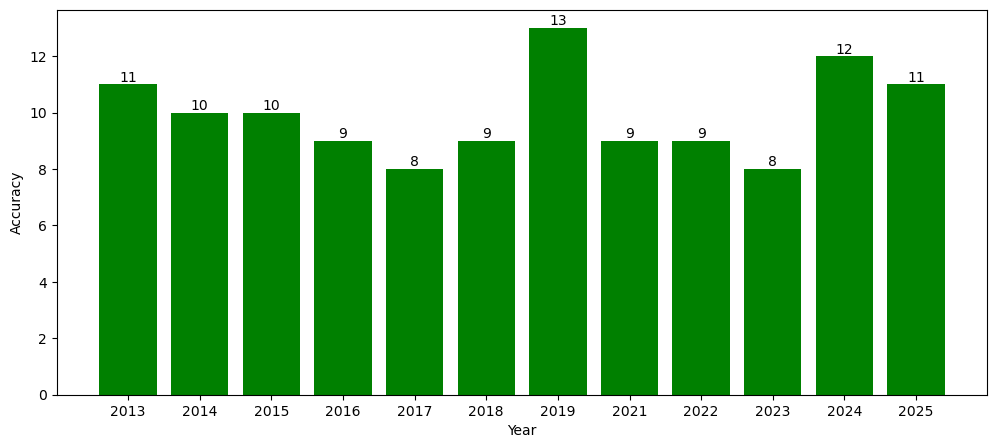

In [291]:
correct_s16(df, years)

In [265]:
df[(df['Year'] == 2019) & ((df['Wins'] > 1) & (df['Proj_Wins_Binned'] > 1))]

,Year,Team,Seed,Wins,Wins_Rank,Proj_Wins,Proj_Wins_Rank,Proj_Wins_Binned
402,2019,Virginia,1,6,1,3.058160,2,5
395,2019,Texas Tech,3,5,2,1.411822,9,2
369,2019,Michigan St.,2,4,3,2.169324,5,3
342,2019,Auburn,5,4,3,1.944300,5,3
387,2019,Purdue,3,3,5,1.904395,9,2
349,2019,Duke,1,3,5,3.866203,1,6
362,2019,Kentucky,2,3,5,2.134201,5,3
355,2019,Gonzaga,1,3,5,2.084196,5,3
377,2019,North Carolina,1,2,9,2.349702,3,4
403,2019,Virginia Tech,4,2,9,1.557172,9,2


In [292]:
def correct_f4(df, years):
    
    correct = []

    for year in years:

        correct.append(len(df[(df['Year'] == year) & ((df['Wins'] > 3) & (df['Proj_Wins_Binned'] > 3))]))

    x = np.arange(len(years))

    plt.figure(figsize=(12, 5))

    plt.bar(x, correct, color='g', label='Correct')

    plt.xlabel('Year')
    plt.ylabel('Accuracy')
    plt.xticks(x, years)
    for i, correct in enumerate(correct):
           plt.text(i, correct, str(correct), ha='center', va='bottom') 

    plt.show()

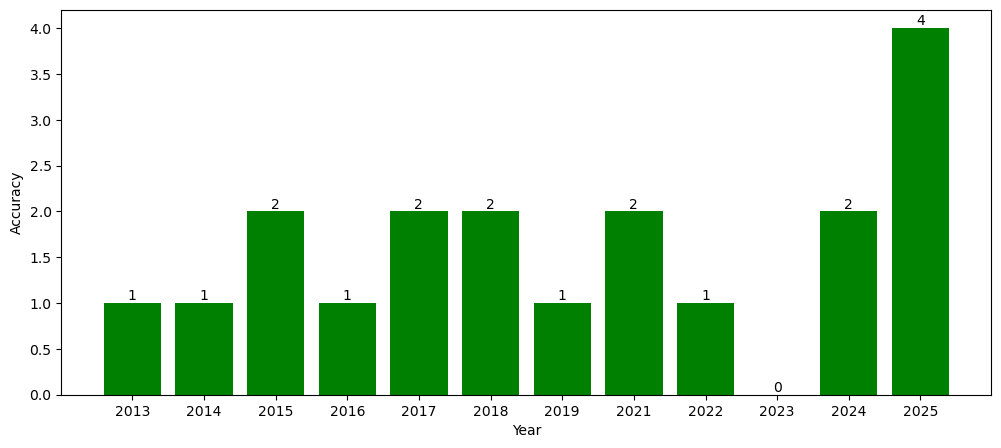

In [293]:
correct_f4(df, years)

In [270]:
df[(df['Year'] == 2025) & ((df['Wins'] > 3) & (df['Proj_Wins_Binned'] > 3))]

,Year,Team,Seed,Wins,Wins_Rank,Proj_Wins,Proj_Wins_Rank,Proj_Wins_Binned
16,2025,Florida,1,6,1,2.792968,3,4
21,2025,Houston,1,5,2,3.750173,2,5
15,2025,Duke,1,4,3,3.805286,1,6
6,2025,Auburn,1,4,3,2.388936,3,4


In [329]:
def points(df, years):
    
    scores = []
        
    for year in years:
                
        score = 0
        
        score = score + (10 * len(df[(df['Year'] == year) & (df['Wins'] > 0) & (df['Proj_Wins_Binned'] > 0)]))
        score = score + (20 * len(df[(df['Year'] == year) & (df['Wins'] > 1) & (df['Proj_Wins_Binned'] > 1)]))
        score = score + (40 * len(df[(df['Year'] == year) & (df['Wins'] > 2) & (df['Proj_Wins_Binned'] > 2)]))
        score = score + (80 * len(df[(df['Year'] == year) & (df['Wins'] > 3) & (df['Proj_Wins_Binned'] > 3)]))
        score = score + (160 * len(df[(df['Year'] == year) & (df['Wins'] > 4) & (df['Proj_Wins_Binned'] > 4)]))
        score = score + (320 * len(df[(df['Year'] == year) & (df['Wins'] > 5) & (df['Proj_Wins_Binned'] > 5)]))
        
        scores.append(score)
        
    x = np.arange(len(years))

    plt.figure(figsize=(12, 5))

    plt.bar(x, scores, color='g', label='Correct')

    plt.xlabel('Year')
    plt.ylabel('Score')
    plt.xticks(x, years)
    for i, score in enumerate(scores):
           plt.text(i, score, str(score), ha='center', va='bottom') 

    plt.show()


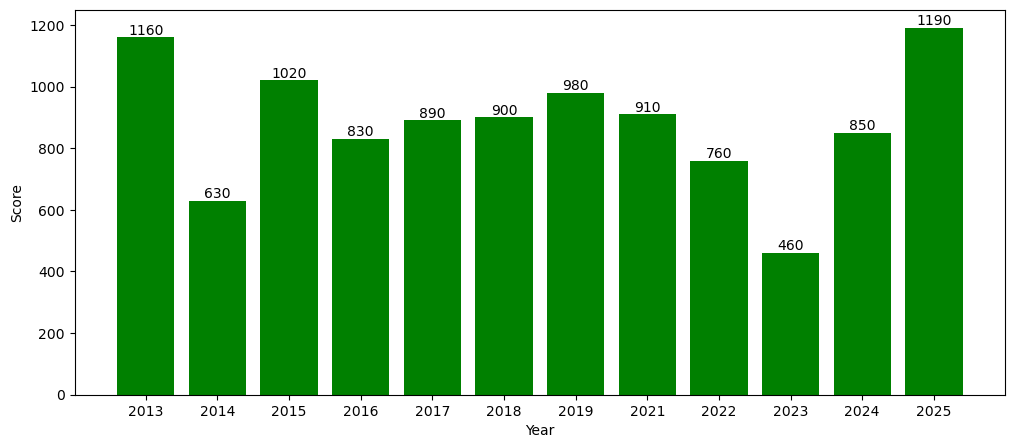

In [330]:
points(df, years)

In [371]:
teams = pd.read_csv("data/march_teams.csv")

In [372]:
combined = df.merge(teams, how="outer", on=["Team", "Year"])

In [373]:
combined

,Year,Team,Seed_x,Wins,Wins_Rank,Proj_Wins,Proj_Wins_Rank,Proj_Wins_Binned,Seed_y,Region
0,2014,Connecticut,7,6,1,0.986478,17,1,7,East
1,2022,Kansas,1,6,1,2.587712,2,5,1,Midwest
2,2017,North Carolina,1,6,1,2.642189,2,5,1,South
3,2021,Baylor,1,6,1,2.648861,3,4,1,South
4,2013,Louisville,1,6,1,3.441082,1,6,1,Midwest
...,...,...,...,...,...,...,...,...,...,...
811,2018,Arizona St.,11,0,33,0.652191,33,0,11,Midwest
812,2018,Arizona,4,0,33,1.431637,9,2,4,South
813,2017,Winthrop,13,0,33,0.240346,33,0,13,South
814,2017,Wake Forest,11,0,33,0.653970,33,0,11,South


In [374]:
combined['Seed'] = combined['Seed_y'].astype(int)

In [375]:
del combined['Seed_y']

In [376]:
del combined['Seed_x']

In [377]:
combined.isnull().values.any()

False

In [378]:
combined = combined.sort_values(by=["Year", "Region"], ascending=False)

In [379]:
combined.to_csv('data/combined.csv')